In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [25]:
inp_dir=r"C:\Users\Ash kan\Documents\watbalpy\waterball_test\modelito_for_paper_tests\v5_modelito_change_zone_5_6_soil_charc\all_regions_and_Total_report.csv"
df=pd.read_csv(inp_dir)

c:\Users\Ash kan\.conda\envs\pysplitenv\lib\site-packages\pandas\core\generic.py:9032: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(cond, other, inplace, axis, level, errors=errors)


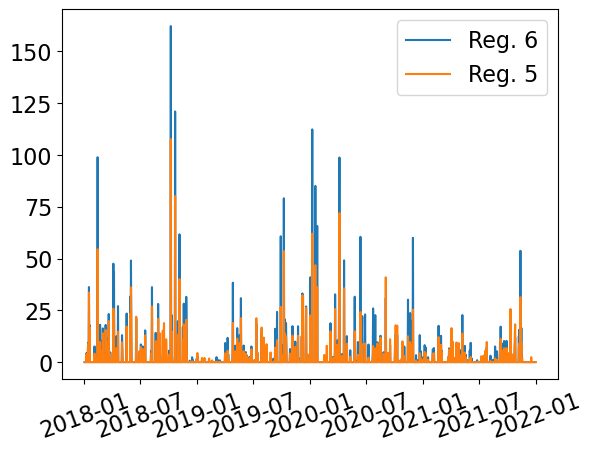

In [26]:
ax = plt.gca()
df_=df.set_index(pd.to_datetime(df["Time"]))
feat="Prec"
for n in [5,4]:
    ii="REG_"+str(n+1)+"_"+feat
    df_[[ii]].mask(df_[[ii]] <0, 0, inplace=True)
    plt.plot(df_[[ii]],label="Reg. " + str(n+1))
plt.legend()
plt.xticks(rotation=20)
#plt.figure().set_figwidth(20)
plt.savefig(os.path.join(r"C:\Users\Ash kan\Desktop\waterpybal\waterpybal manuscript\synth_example_figs",feat+"_all_regions.png"),dpi=600)
plt.show()

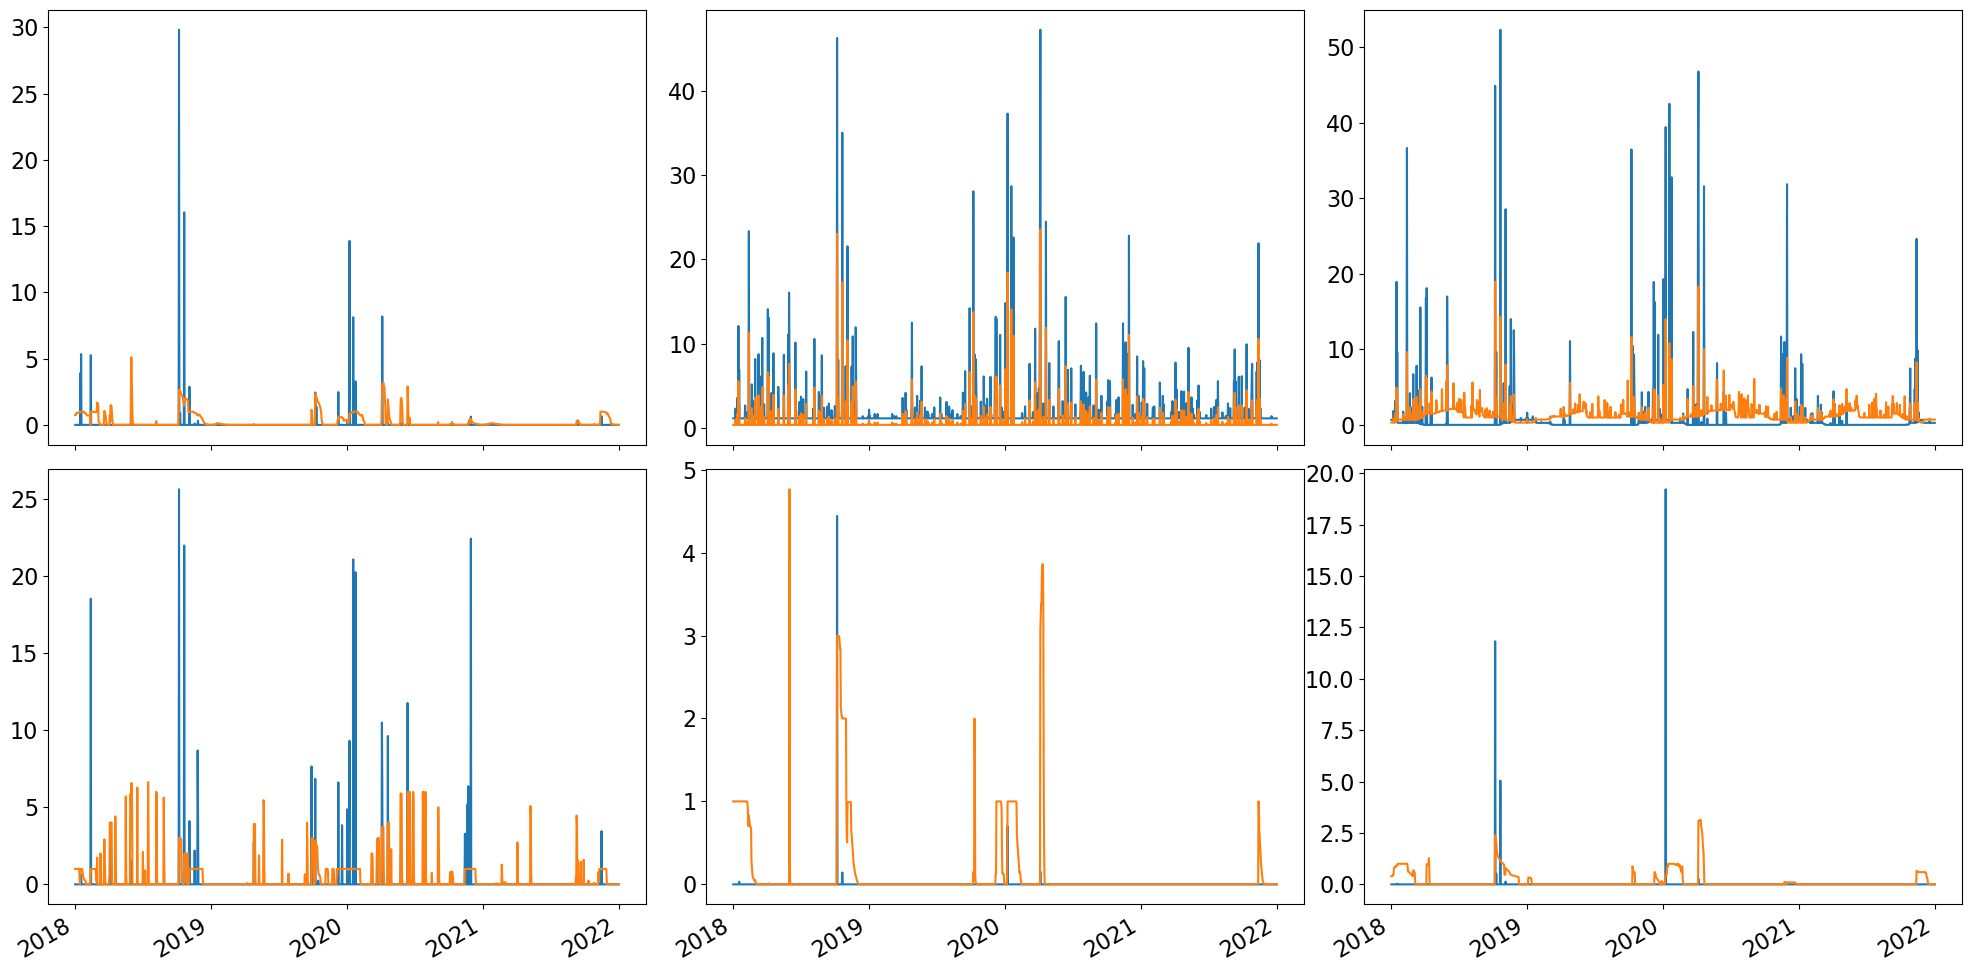

In [27]:
import matplotlib.dates as mdates
#fig, axs = plt.subplots(2,3,sharex=True, sharey=True)
fig, axs = plt.subplots(2,3)

#ax = plt.gca()

df_=df.set_index(pd.to_datetime(df["Time"]))
df_.index = pd.to_datetime(df_.index).date
zones=[1,2,3,4,5,6]
featlist=["Rec","ETR","Prec"]
#featlist=["Runoff"]
for zone in zones:
    for featu in featlist:
        ii="REG_"+str(zone)+"_"+featu
        #print (ii)
        df_.loc[df_[ii] <0, ii] = 0        
        
        if featu!="Prec":
            if featu=="ETR": featu="RET"
            axs.flat[zone-1].plot(df_[ii],label=featu)
            if zone==1:axs.flat[zone-1].legend
            
        else:# create twinx for rain
            axs.flat[zone-1].twinx().plot(df_[ii],label=featu)
            #ax2.set_ylim(ax2.get_ylim()[::-1])
            #ax2.invert_yaxis()



    
    #plt.ylim(0,180)
    #plt.subplot(2, 3, zone)
    plt.xticks(rotation=90)
    plt.title("Region "+ str(zone),fontsize=8)
    plt.subplot(2, 3, zone).xaxis.set_major_locator(mdates.YearLocator())
    plt.subplot(2, 3, zone).xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gcf().autofmt_xdate()
    fig.set_figwidth(20)
    fig.set_figheight(10)

    fig.tight_layout(h_pad=0.5,w_pad=1)
font = {'size'   : 16}

plt.rc('font', **font)
plt.savefig(os.path.join(r"C:\Users\Ash kan\Desktop\waterpybal\waterpybal manuscript\synth_example_figs",str(zone)+"_all_features.png"),dpi=600)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


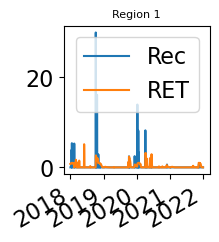

In [28]:
ax = []
import matplotlib.dates as mdates
#fig, axs = plt.subplots(2,3,sharex=True, sharey=True)
#fig, axs = plt.subplots(2,3)

#ax = plt.gca()

df_=df.set_index(pd.to_datetime(df["Time"]))
df_.index = pd.to_datetime(df_.index).date
zones=[1,2,3,4,5,6]
featlist=["Rec","ETR","Prec"]
#featlist=["Runoff"]
#for zone in zones:
for featu in featlist:
    zone=1

    ii="REG_"+str(zone)+"_"+featu
    #print (ii)
    df_.loc[df_[ii] <0, ii] = 0        
    ax.append(plt.subplot(2, 3, zone))
    if featu!="Prec":
        if featu=="ETR": featu="RET"
        plt.subplot(2, 3, zone).plot(df_[ii],label=featu)
        if zone==1:plt.subplot(2, 3, zone).legend()
        
    else:# create twinx for rain
        ax.append(plt.subplot(2, 3, zone).twinx())
        plt.subplot(2, 3, zone).twinx().plot(df_[ii],label=featu)
        #ax2.set_ylim(ax2.get_ylim()[::-1])
        #ax2.invert_yaxis()
        plt.subplot(2, 3, zone).twinx().legend()



    
    #plt.ylim(0,180)
    #plt.subplot(2, 3, zone)
    plt.xticks(rotation=90)
    plt.title("Region "+ str(zone),fontsize=8)
    plt.subplot(2, 3, zone).xaxis.set_major_locator(mdates.YearLocator())
    plt.subplot(2, 3, zone).xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gcf().autofmt_xdate()
    fig.set_figwidth(20)
    fig.set_figheight(10)

    fig.tight_layout(h_pad=0.5,w_pad=1)
font = {'size'   : 16}

plt.rc('font', **font)
plt.savefig(os.path.join(r"C:\Users\Ash kan\Desktop\waterpybal\waterpybal manuscript\synth_example_figs",str(zone)+"_all_features.png"),dpi=600)
plt.show()

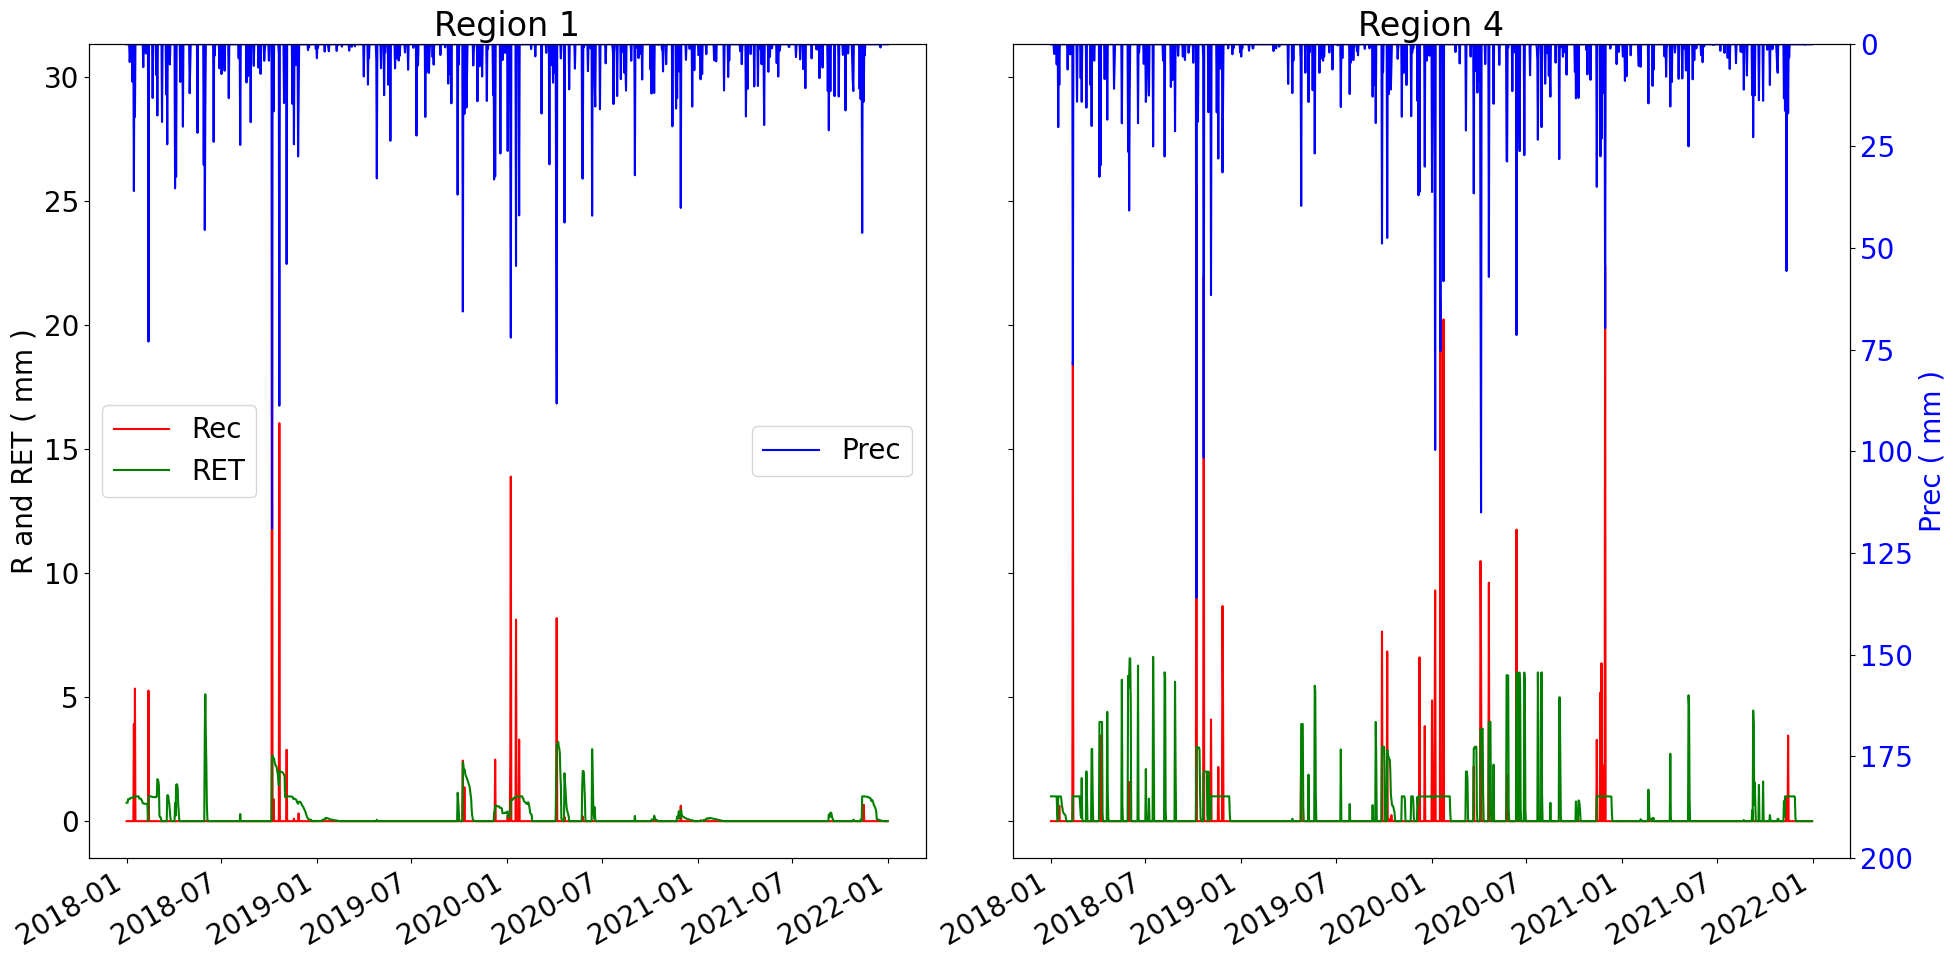

In [44]:
import numpy as np
import matplotlib.pyplot as plt
df_=df.set_index(pd.to_datetime(df["Time"]))
df_.index = pd.to_datetime(df_.index).date
# Create some mock data

fig, axs = plt.subplots(1, 2,sharex=True, sharey=True)

featlist=["Rec","ETR","Prec"]
#featlist=["Runoff"]
#for zone in zones:
cols=['red','green','blue']
zones=[1,4]

font = {'size'   : 20}


plt.rc('font', **font)
for n,zone in enumerate(zones):
    for featu,col in zip(featlist,cols):
        ii="REG_"+str(zone)+"_"+featu
        #color = 'tab:red'
        if featu in ["Rec","ETR"]:
            if featu=="ETR": featu="RET"
            #plt.subplot(2, 3, zone).set_xlabel('time (s)')
            #plt.subplot(2, 3, zone).set_ylabel('exp')
            plt.subplot(1,2, n+1).plot(df_[ii],label=featu,color=col)
            if zone==1: plt.subplot(1, 2, n+1).legend(loc='center left')

        #plt.subplot(2, 3, zone).plot(df_[ii],label=featu, color=color)

        #plt.subplot(2, 3, zone).tick_params(axis='y', labelcolor=color)
        if zone==1: plt.subplot(1, 2, n+1).set_ylabel( "R and RET ( mm )")
        ax2 = plt.subplot(1, 2, n+1).twinx()  # instantiate a second axes that shares the same x-axis
        if featu=="Prec":
              # we already handled the x-label with ax1
            ax2.plot(df_[ii], color=col,label=featu)
            ax2.set_ylim(0,200)
            ax2.invert_yaxis()
            if zone==1: ax2.legend(loc='center right')
            if zone==4: 
                ax2.set_ylabel("Prec ( mm )", color=col)
                ax2.tick_params(axis='y', labelcolor=col)
            else:
                ax2.get_yaxis().set_ticks([])
                

    plt.xticks(rotation=20)
    plt.title("Region "+ str(zone))
    #plt.subplot(2, 3, zone).xaxis.set_major_locator(mdates.YearLocator())
    #plt.subplot(2, 3, zone).xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gcf().autofmt_xdate()



fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout(h_pad=1,w_pad=0.001)

plt.savefig(os.path.join(r"C:\Users\Ash kan\Desktop\waterpybal\waterpybal manuscript\synth_example_figs","oriz_14_all_features.png"),dpi=600)
plt.show()

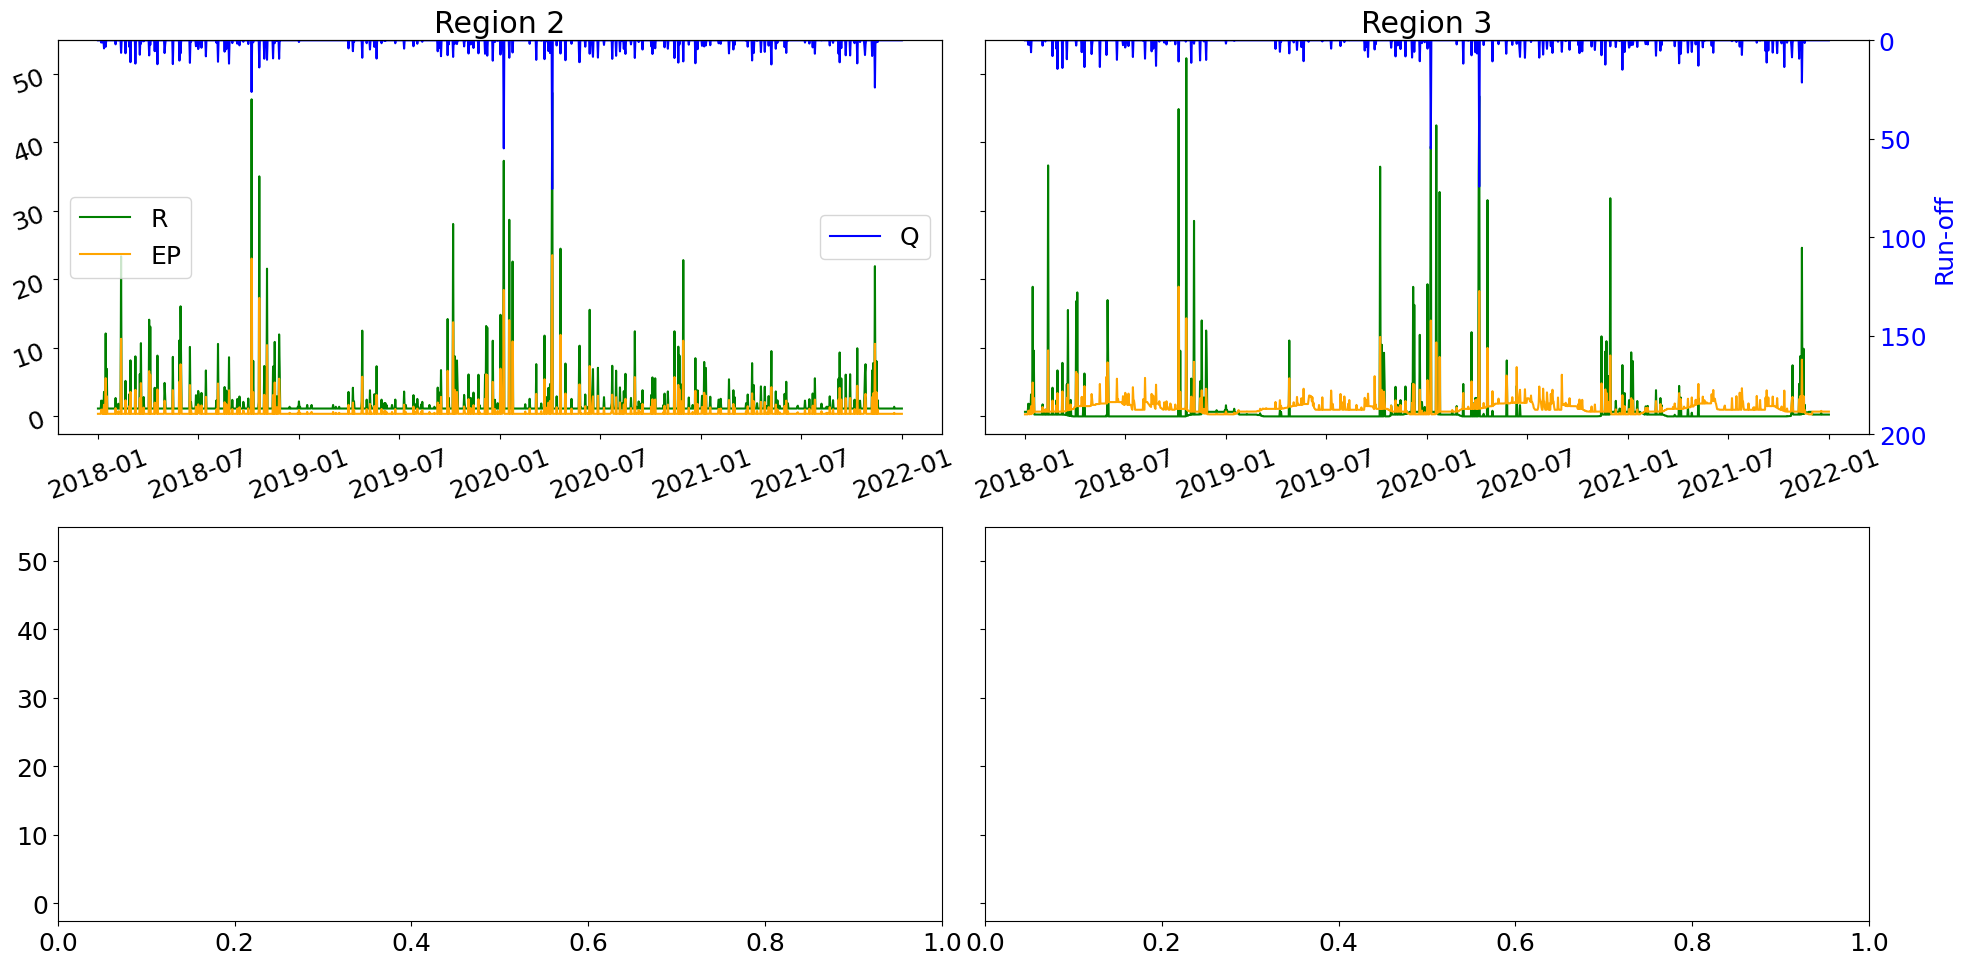

In [308]:
import numpy as np
import matplotlib.pyplot as plt
df_=df.set_index(pd.to_datetime(df["Time"]))
df_.index = pd.to_datetime(df_.index).date
# Create some mock data

fig, axs = plt.subplots(2, 2, sharey=True)

featlist=["Rec","ETR","Runoff"]
#featlist=["Runoff"]
#for zone in zones:
cols=['green','orange','blue','red']

zones=[2,3]
for zone in zones:
    
    df.loc[df["REG_"+str(zone)+"_Runoff"] <0, "REG_"+str(zone)+"_Runoff"] = 0
    for featu,col in zip(featlist,cols):
        ii="REG_"+str(zone)+"_"+featu
        #color = 'tab:red'
        if featu in ["ETR","Rec"]:
            if featu=="ETR": featu="EP"
            if featu=="Rec": featu="R"
            #plt.subplot(2, 3, zone).set_xlabel('time (s)')
            #plt.subplot(2, 3, zone).set_ylabel('exp')
            plt.subplot(2, 2, zone-1).plot(df_[ii],label=featu,color=col)
            if zone==2: plt.subplot(2, 2, zone-1).legend(loc='center left')

        #plt.subplot(2, 3, zone).plot(df_[ii],label=featu, color=color)

        #plt.subplot(2, 3, zone).tick_params(axis='y', labelcolor=color)
        plt.subplot(2, 2, zone-1).tick_params(rotation=20)
        ax2 = plt.subplot(2, 2, zone-1).twinx()  # instantiate a second axes that shares the same x-axis
        if featu=="Runoff":
            if featu=="Runoff": featu="Q"
              # we already handled the x-label with ax1
            ax2.plot(df_[ii], color=col,label=featu)
            ax2.set_ylim(0,200)
            ax2.invert_yaxis()
            if zone==2: ax2.legend(loc='center right')
            if zone in [3]: 
                ax2.set_ylabel("Run-off", color=col)
                ax2.tick_params(axis='y', labelcolor=col)
            else:
                ax2.get_yaxis().set_ticks([])
                

    
    plt.title("Region "+ str(zone))




left, width = -0.015, .5
bottom, height = -0.015, .5




plt.rc('font', **font)
fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout(h_pad=1,w_pad=0.001)
plt.savefig(os.path.join(r"C:\Users\Ash kan\Desktop\waterpybal\waterpybal manuscript\synth_example_figs","1_.png"),dpi=600)

#plt.gcf().autofmt_xdate()
plt.show()

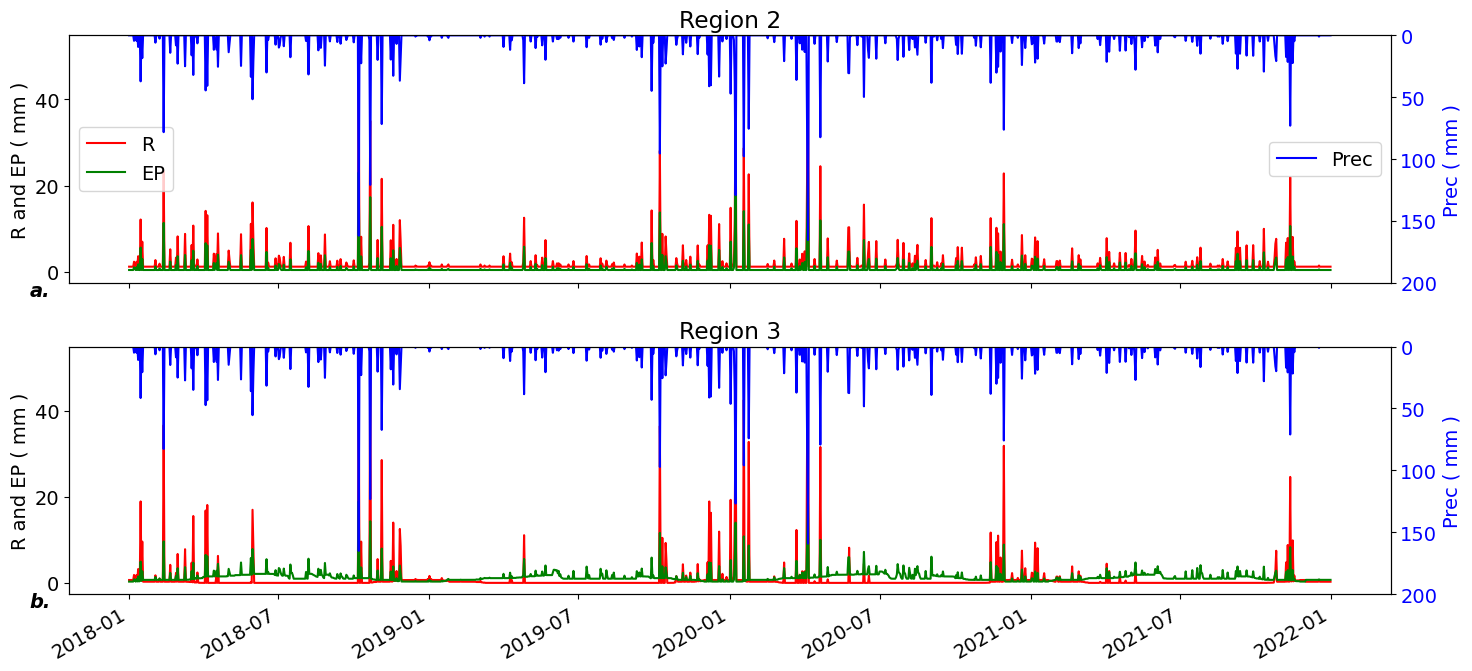

In [30]:
import numpy as np
import matplotlib.pyplot as plt
df_=df.set_index(pd.to_datetime(df["Time"]))
df_.index = pd.to_datetime(df_.index).date
# Create some mock data

fig, axs = plt.subplots(2,1,sharex=True, sharey=True)

left,bottom=-0.03,-0.07
plt.subplot(2,1, 1).text(left, bottom, "a.",
    horizontalalignment='left',
    verticalalignment='bottom',transform=plt.subplot(2,1, 1).transAxes,style='italic', weight='bold')
plt.subplot(2,1, 2).text(left, bottom, "b.",
    horizontalalignment='left',
    verticalalignment='bottom',transform=plt.subplot(2,1, 2).transAxes,style='italic', weight='bold')

featlist=["Rec","ETR","Prec"]
#featlist=["Runoff"]
#for zone in zones:
cols=['red','green','blue']
zones=[2,3]


for n,zone in enumerate(zones):
    for featu,col in zip(featlist,cols):
        ii="REG_"+str(zone)+"_"+featu
        #color = 'tab:red'
        if featu in ["Rec","ETR"]:
            if featu=="ETR": featu="EP"
            if featu=="Rec": featu="R"
            #plt.subplot(2, 3, zone).set_xlabel('time (s)')
            #plt.subplot(2, 3, zone).set_ylabel('exp')
            plt.subplot(2,1, n+1).plot(df_[ii],label=featu,color=col)
            if zone==2: 
                plt.subplot(2,1, n+1).legend(loc='center left')

        #plt.subplot(2, 3, zone).plot(df_[ii],label=featu, color=color)

        #plt.subplot(2, 3, zone).tick_params(axis='y', labelcolor=color)
        plt.subplot(2,1, n+1).set_ylabel( "R and EP ( mm )")
        ax2 = plt.subplot(2,1, n+1).twinx()  # instantiate a second axes that shares the same x-axis
        if featu=="Prec":
              # we already handled the x-label with ax1
            ax2.plot(df_[ii], color=col,label=featu)
            ax2.set_ylim(0,200)
            ax2.invert_yaxis()
            if zone==2: ax2.legend(loc='center right')
            #if zone==3: 
            ax2.set_ylabel("Prec ( mm )", color=col)
            ax2.tick_params(axis='y', labelcolor=col)
            #else:
            #    ax2.get_yaxis().set_ticks([])
                

    plt.xticks(rotation=20)
    plt.title("Region "+ str(zone))
    #plt.subplot(2, 3, zone).xaxis.set_major_locator(mdates.YearLocator())
    #plt.subplot(2, 3, zone).xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gcf().autofmt_xdate()





font = {'size'   : 16}

plt.rc('font', **font)
fig.set_figwidth(15)
fig.set_figheight(7)
fig.tight_layout(h_pad=1,w_pad=0.001)
plt.savefig(os.path.join(r"C:\Users\Ash kan\Desktop\waterpybal\waterpybal manuscript\synth_example_figs","23_all_features.png"),dpi=600)
plt.show()